# LUT Verificaton

In [40]:
import scipy as sp
import matplotlib
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
from scipy import linalg
import os 
import sys
%matplotlib inline
#%matplotlib notebook

## Load the random grid, and prepare all input files for LUT

0=rho, 1=P, 2=SoundSpeed, 3=Cp, 4=Entropy, 5=Mu, 6=Kt, 7=dpdrho_e, 8=dpde_rho, 9=dTdrho_e, 10=dTde_rho, 11=T, 12=StaticEnergy

In [62]:
randoms = sp.genfromtxt('random.dat', skip_header=1)
rho          = randoms[:,0];
P            = randoms[:,1];
SoundSpeed   = randoms[:,2];
Cp           = randoms[:,3];
Entropy      = randoms[:,4];
Mu           = randoms[:,5];
Kt           = randoms[:,6];
dPdrho_e     = randoms[:,7];
dPde_rho     = randoms[:,8];
dTdrho_e     = randoms[:,9];
dTde_rho     = randoms[:,10];
T            = randoms[:,11];
StaticEnergy = randoms[:,12];
Enthalpy     = randoms[:,13];


#Prepare the input files
sp.savetxt('rhoe_in.dat',sp.column_stack((rho,StaticEnergy)), delimiter='\t')
sp.savetxt('PT_in.dat'  ,sp.column_stack((P,T)), delimiter='\t')
sp.savetxt("Prho_in.dat",sp.column_stack((P,rho)), delimiter='\t')
sp.savetxt("rhoT_in.dat",sp.column_stack((rho,T)), delimiter='\t')
sp.savetxt("Ps_in.dat"  ,sp.column_stack((P,Entropy)), delimiter='\t')
sp.savetxt("hs_in.dat"  ,sp.column_stack((Enthalpy,Entropy)), delimiter='\t')

## RUN the verification

In [93]:
for f in ("rhoe_out.dat","PT_out.dat", "Prho_out.dat","rhoT_out.dat","Ps_out.dat","hs_out.dat"):
    try:
         os.remove(f)
    except OSError:
         pass

os.system('Debug/TableReader>log')
with open('log') as l:
    l= l.readlines();


In [94]:

    #import the grid
mesh = sp.genfromtxt('mesh.dat', skip_header=0, delimiter=',')
mesh_Temperature  = mesh[:,0];
mesh_Density      = mesh[:,1];
mesh_Enthalpy     = mesh[:,2];
mesh_StaticEnergy = mesh[:,3];
mesh_Entropy      = mesh[:,4];
mesh_Pressure     = mesh[:,5];
mesh_SoundSpeed2  = mesh[:,6];
mesh_dPdrho_e     = mesh[:,7];
mesh_dPde_rho     = mesh[:,8];
mesh_dTdrho_e     = mesh[:,9];
mesh_dTde_rho     = mesh[:,10];
mesh_Cp           = mesh[:,11];
mesh_Mu           = mesh[:,12];
mesh_P_dim = sp.where((mesh_Density-mesh_Density[0])!=0)[0][0]
mesh_D_dim = len(mesh_Density)/mesh_P_dim
print mesh_D_dim, mesh_P_dim

20 20


## Function lib

In [90]:

def load_interp(filename):
    interp_data = sp.genfromtxt(filename, delimiter=', ')
    global   interp_Temperature ;
    global   interp_Density     ;
    global   interp_Enthalpy    ;
    global   interp_StaticEnergy;
    global   interp_Entropy     ;
    global   interp_Pressure    ;
    global   interp_SoundSpeed2 ;
    global   interp_dPdrho_e    ;
    global   interp_dPde_rho    ;
    global   interp_dTdrho_e    ;
    global   interp_dTde_rho    ;
    global   interp_Cp          ;
    global   interp_Mu          ;
    global   interp_Kt          ;
    interp_Temperature  = interp_data[:,0];
    interp_Density      = interp_data[:,1];
    interp_Enthalpy     = interp_data[:,2];
    interp_StaticEnergy = interp_data[:,3];
    interp_Entropy      = interp_data[:,4];
    interp_Pressure     = interp_data[:,5];
    interp_SoundSpeed2  = interp_data[:,6];
    interp_dPdrho_e     = interp_data[:,7];
    interp_dPde_rho     = interp_data[:,8];
    interp_dTdrho_e     = interp_data[:,9];
    interp_dTde_rho     = interp_data[:,10];
    interp_Cp           = interp_data[:,11];
    interp_Mu           = interp_data[:,12];
    #interp_dmudrho_T    = interp_data[:,13];
    #interp_dmudT_rho    = interp_data[:,14];
    interp_Kt           = interp_data[:,15];
    #interp_dktdrho_T    = interp_data[:,16];
    #interp_dktdT_rho    = interp_data[:,17];
    return 
#Plot the RMS of the error across all interpolated variables
def plot_RMS(x,y):
    REL_ERR = ((interp_Temperature-T)/max(T))**2;
    REL_ERR = REL_ERR + ((interp_Density-rho)/max(rho))**2;
    REL_ERR = REL_ERR + ((interp_Enthalpy-Enthalpy)/max(Enthalpy))**2;
    REL_ERR = REL_ERR + ((interp_StaticEnergy-StaticEnergy)/max(StaticEnergy))**2;
    REL_ERR = REL_ERR + ((interp_Entropy-Entropy)/max(Entropy))**2;
    REL_ERR = REL_ERR + ((interp_Pressure-P)/max(P))**2;
    REL_ERR = REL_ERR + ((interp_SoundSpeed2-SoundSpeed)/max(SoundSpeed))**2;
    REL_ERR = REL_ERR + ((interp_dPdrho_e-dPdrho_e)/max(dPdrho_e))**2;
    REL_ERR = REL_ERR + ((interp_dPde_rho-dPde_rho)/max(dPde_rho))**2;
    REL_ERR = REL_ERR + ((interp_dTdrho_e-dTdrho_e)/max(dTdrho_e))**2;
    REL_ERR = REL_ERR + ((interp_dTde_rho-dTde_rho)/max(dTde_rho))**2;
    REL_ERR = REL_ERR + ((interp_Cp-Cp)/max(Cp))**2;
    REL_ERR = REL_ERR + ((interp_Mu-Mu)/max(Mu))**2;
    REL_ERR = REL_ERR + ((interp_Kt-Kt)/max(Kt))**2;
    REL_ERR = sp.sqrt(REL_ERR/14.0)
    #REL_ERR = REL_ERR/max(REL_ERR)
    scat=plt.scatter(x,y,c =REL_ERR)
    plt.grid(which='both')
    scat.set_array(REL_ERR)
    plt.colorbar(scat)
    plt.xlim((min(x)*0.95,max(x)*1.05));
    plt.ylim((min(y)*0.95,max(y)*1.05));
    return REL_ERR

def plot_hist_RMS(REL_ERR):
    #adapted from http://matplotlib.org/examples/pylab_examples/histogram_percent_demo.html
    plt.figure(figsize=(16,5))
    plt.title('Historgram of RMS Relative Error')
    plt.ylabel('Percentage of points')
    plt.xlabel('Percentage RMS relative error')
    plt.hist(REL_ERR, bins=25, color='g', alpha=0.5)
    formatter_y = FuncFormatter(yto_percent)
    formatter_x = FuncFormatter(xto_percent)
    plt.gca().yaxis.set_major_formatter(formatter_y)
    plt.gca().xaxis.set_major_formatter(formatter_x)
    plt.grid(which='both')
    return

def yto_percent(y, x):
        s = str(sp.around((y/(len(REL_ERR)*1.0)*100),2))
        if matplotlib.rcParams['text.usetex'] is True:
            return s + r'$\%$'
        else:
            return s + '%' 
    

def xto_percent(y, x):
        s = str(y*100)
        if matplotlib.rcParams['text.usetex'] is True:
            return s + r'$\%$'
        else:
            return s + '%' 
        

def plot_hist_Individual(input1, input2):
    names = [["Temperature", interp_Temperature,T],\
            ["Density", interp_Density,rho],\
            ["Enthalpy",interp_Enthalpy,Enthalpy],\
            ["StaticEnergy", interp_StaticEnergy,StaticEnergy],\
            ["Entropy",interp_Entropy,Entropy],\
            ["Pressure",interp_Pressure,P],\
            ["SoundSpeed", interp_SoundSpeed2,SoundSpeed],\
            ["dPdrho_e",interp_dPdrho_e,dPdrho_e],\
            ["dPde_rho", interp_dPde_rho,dPde_rho],\
            ["Tdrho_e",interp_dTdrho_e,dTdrho_e],\
            ["dTde_rho",interp_dTde_rho,dTde_rho],\
            ["Cp",interp_Cp,Cp],\
            ["Mu", interp_Mu,Mu],\
            ["Kt", interp_Kt,Kt]]
    i =1
    plt.figure(figsize=(16,20))
    for n in names:
        rel_err = (n[1] - n[2])/max(n[2])
        plt.subplot(7,2,i)
        if (n[0] == input1) or (n[0] == input2):
            col ='b'
            plt.title(n[0]+" (input)")
        else:
            col ='g'
            plt.title(n[0])
        plt.hist(rel_err, bins=25, normed=False, color=col, alpha=0.5)
        formatter_y = FuncFormatter(yto_percent)
        formatter_x = FuncFormatter(xto_percent)
        plt.gca().yaxis.set_major_formatter(formatter_y)
        plt.gca().xaxis.set_major_formatter(formatter_x)
        plt.grid(which='both')
        
        i = i+1

    return

#Plot the interpolation grid: 
def plot_mesh(x,y):
    for i in range(mesh_P_dim):
        plt.plot(x[i:][::mesh_P_dim], y[i:][::mesh_P_dim], 'c-', alpha=0.3);
    for i in range(mesh_D_dim):
        plt.plot(x[i*mesh_P_dim:(i+1)*mesh_P_dim], y[i*mesh_P_dim:(i+1)*mesh_P_dim], 'c-', alpha=0.3);




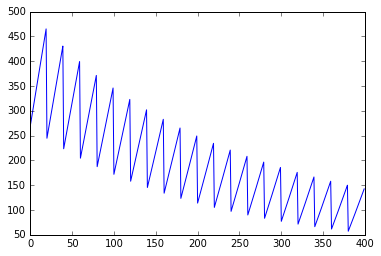

In [91]:
%matplotlib inline
plt.plot(mesh_Temperature)

## RHOE 

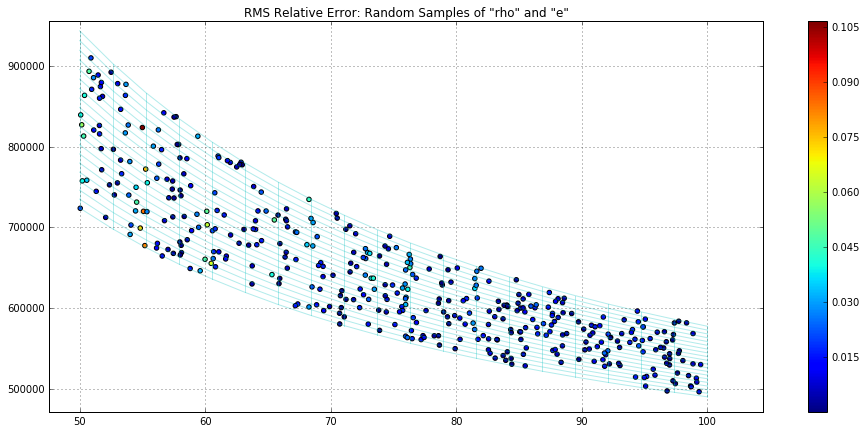

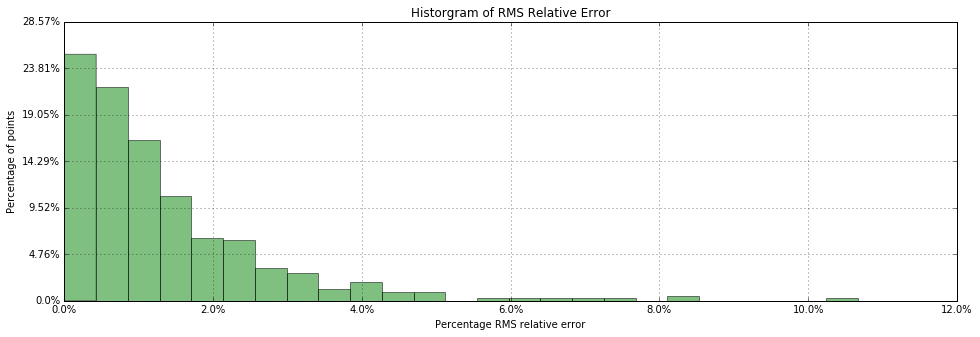

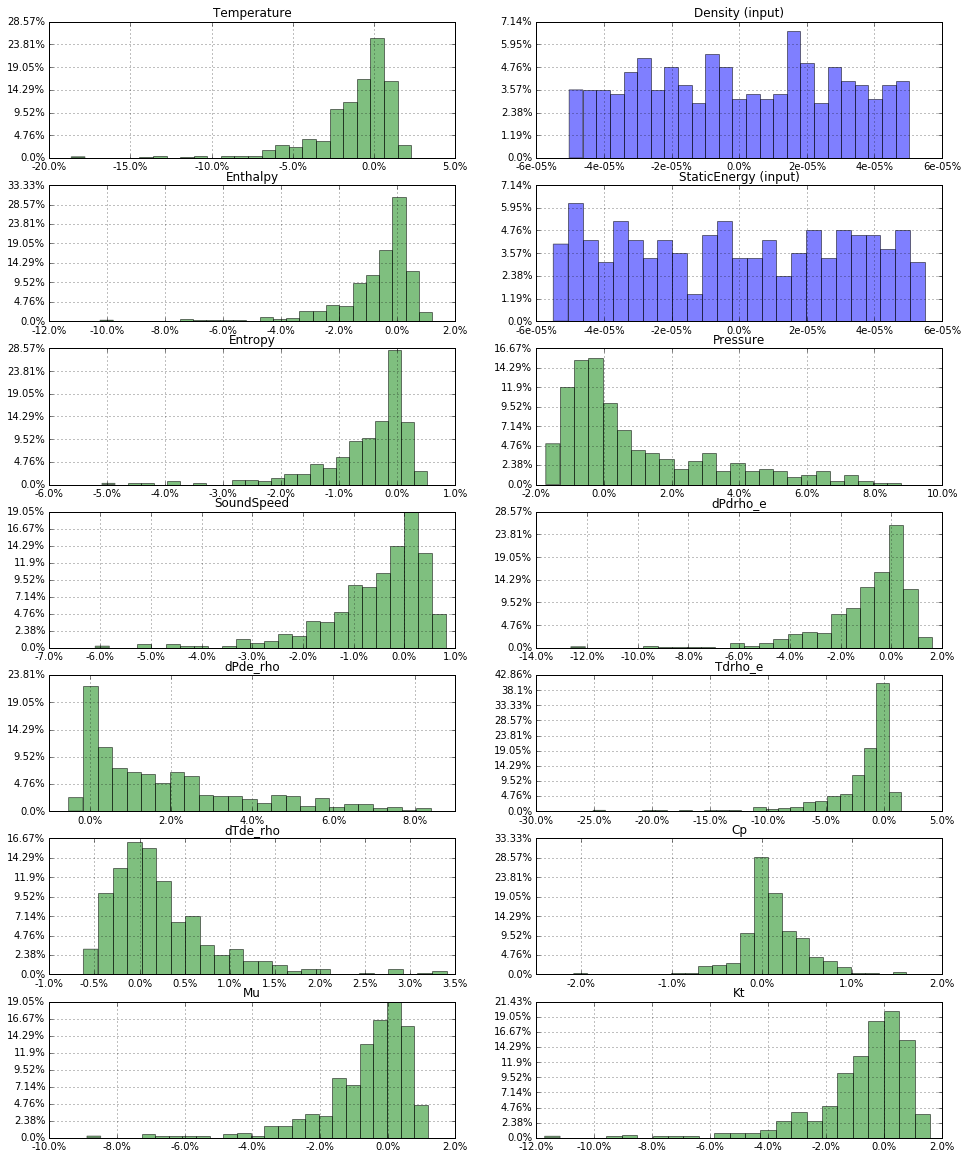

In [99]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "rho" and "e"')
load_interp('rhoe_out.dat')
REL_ERR = plot_RMS(interp_Density,interp_StaticEnergy)
plot_mesh(mesh_Density, mesh_StaticEnergy);
plot_hist_RMS(REL_ERR);
plot_hist_Individual('Density','StaticEnergy');

## PT

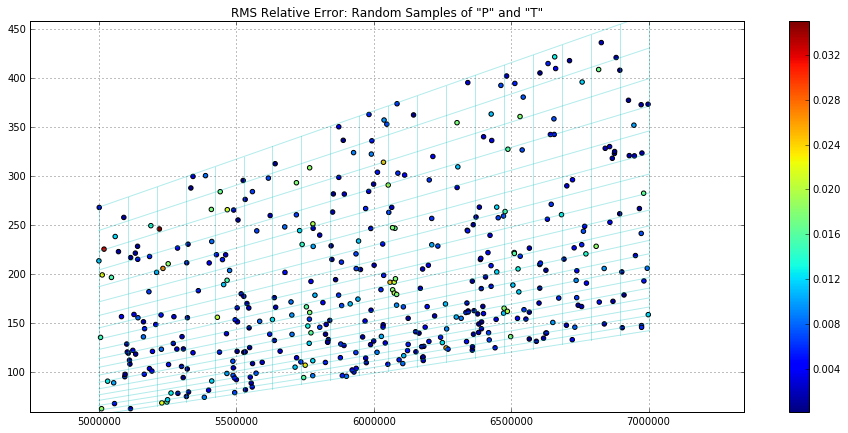

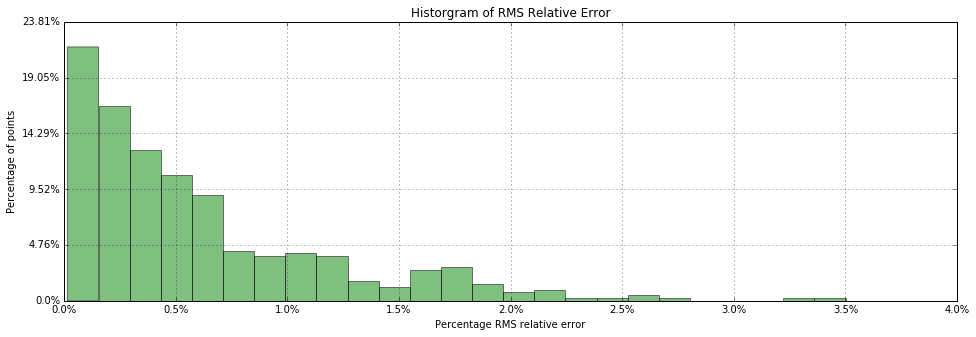

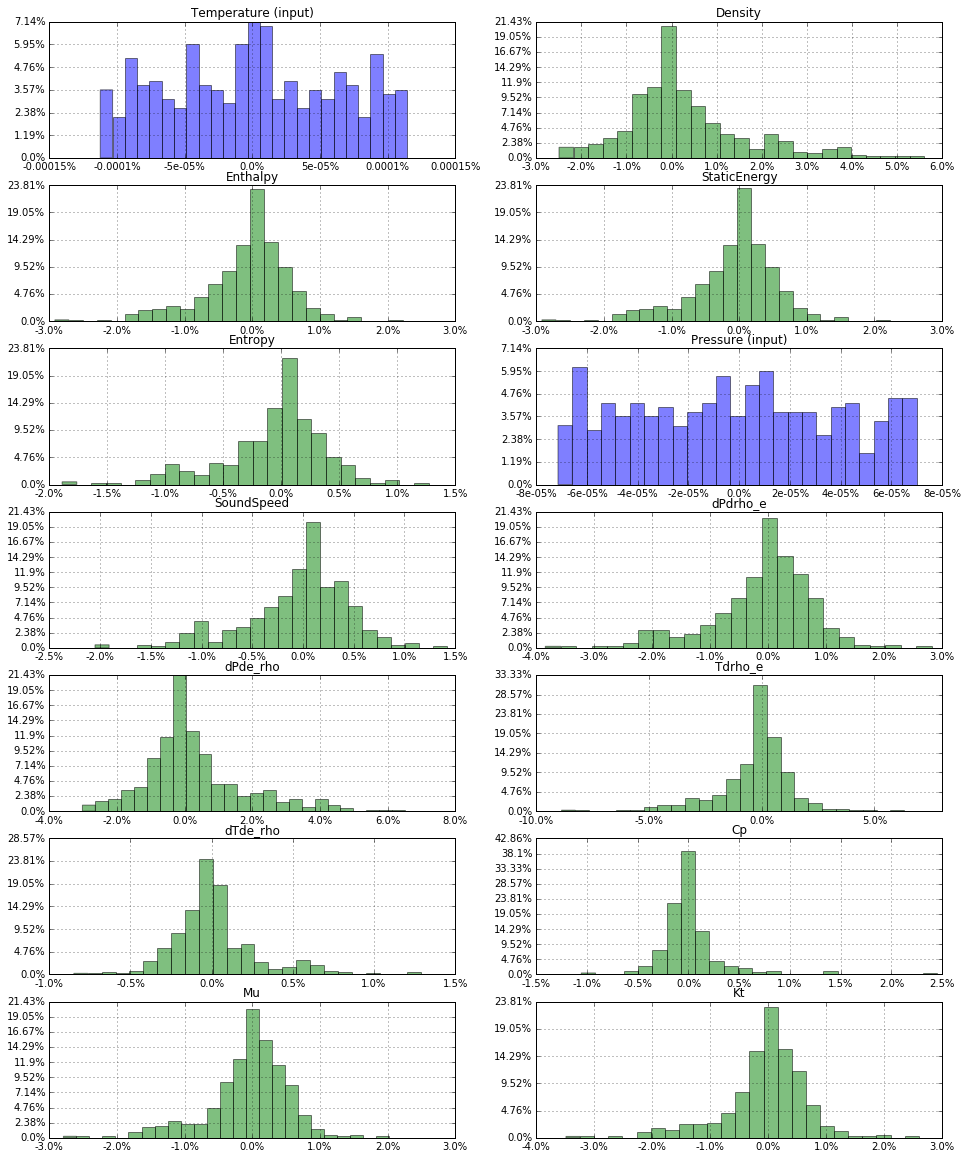

In [100]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "P" and "T"')
load_interp('PT_out.dat')
REL_ERR = plot_RMS(interp_Pressure,interp_Temperature)
plot_mesh(mesh_Pressure, mesh_Temperature);
plot_hist_RMS(REL_ERR);
plot_hist_Individual("Pressure","Temperature");

## PRHO

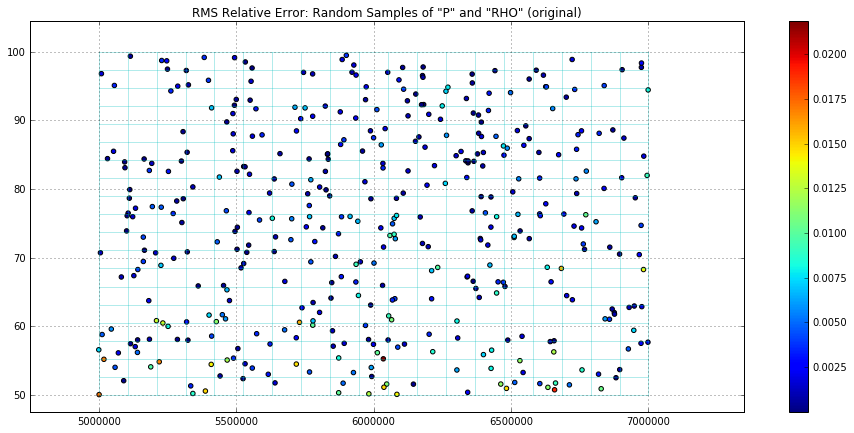

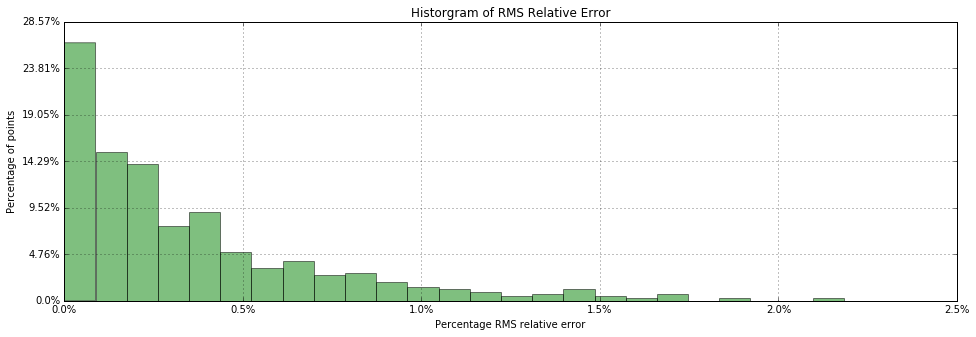

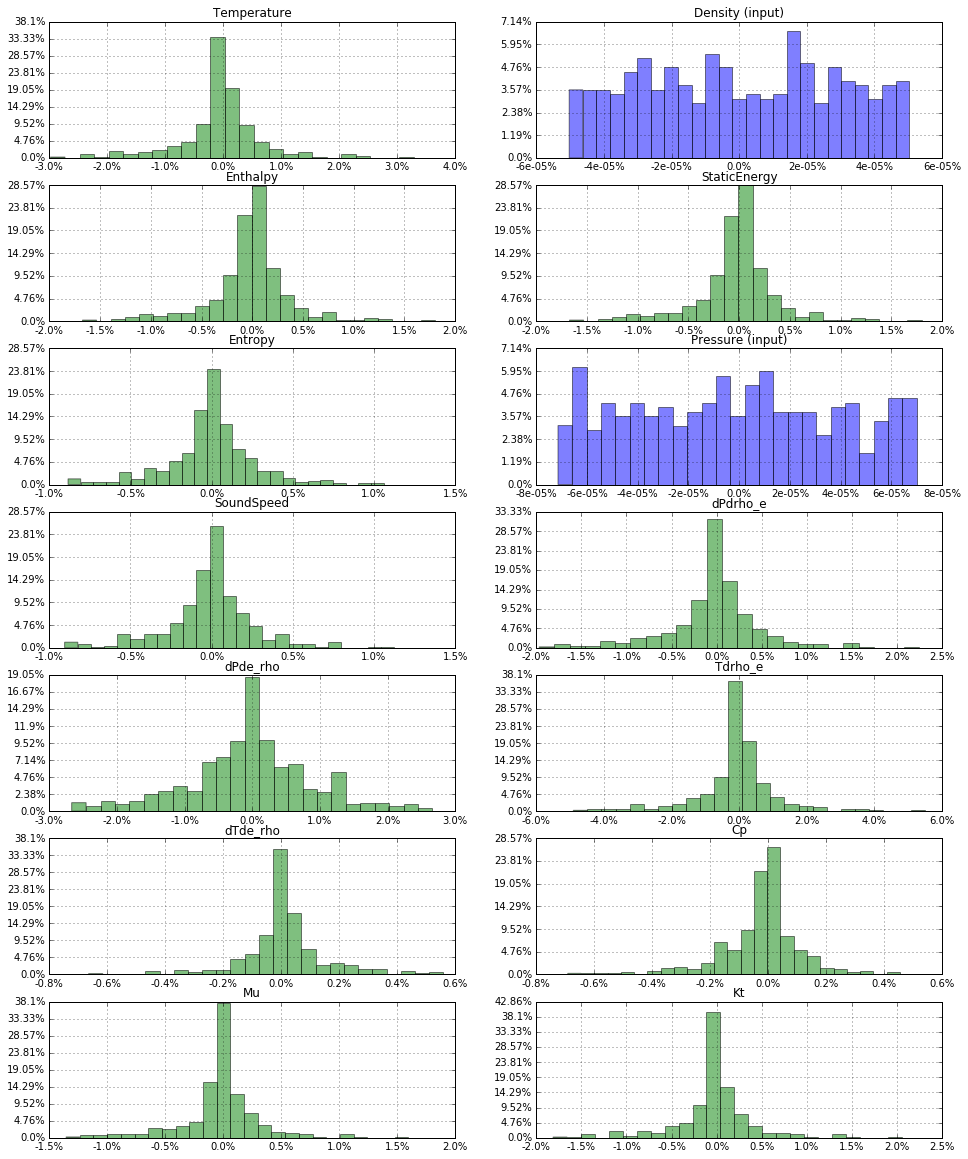

In [101]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "P" and "RHO" (original)')
load_interp('Prho_out.dat')
REL_ERR = plot_RMS(interp_Pressure,interp_Density)
plot_mesh(mesh_Pressure, mesh_Density);
plot_hist_RMS(REL_ERR);
plot_hist_Individual("Pressure","Density");

## RHOT

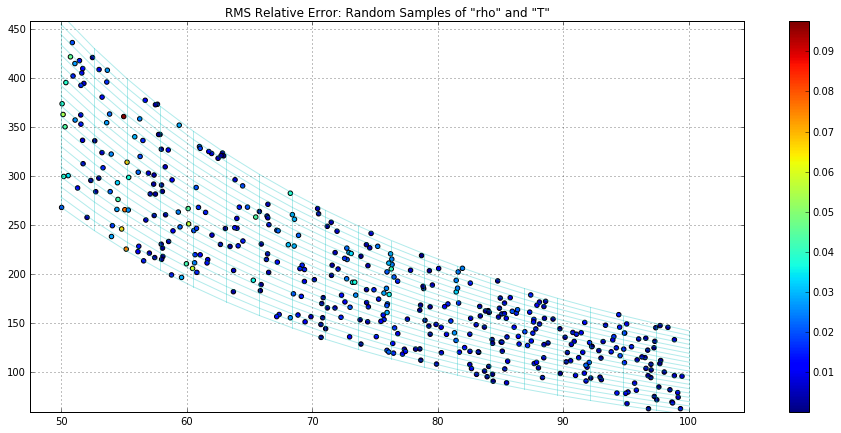

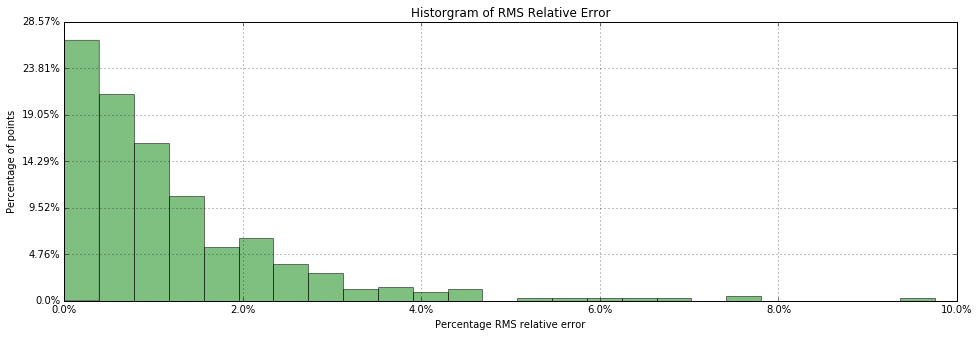

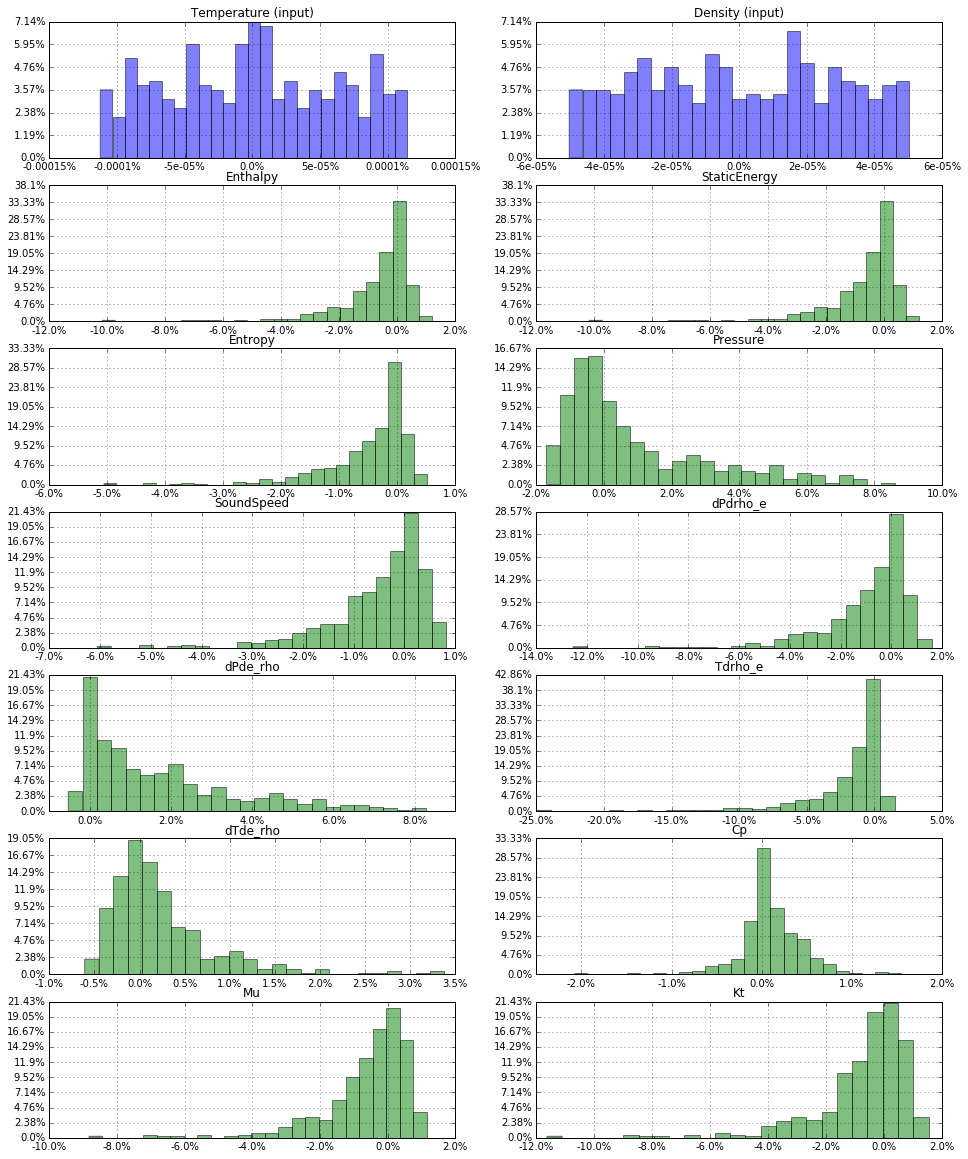

In [102]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "rho" and "T"')
load_interp('rhoT_out.dat')
REL_ERR = plot_RMS(interp_Density,interp_Temperature)
plot_mesh(mesh_Density, mesh_Temperature);
plot_hist_RMS(REL_ERR);
plot_hist_Individual("Density","Temperature");

## PS

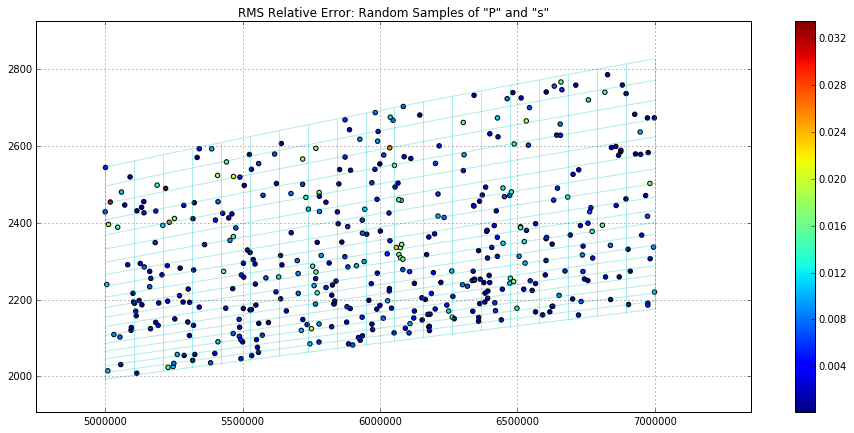

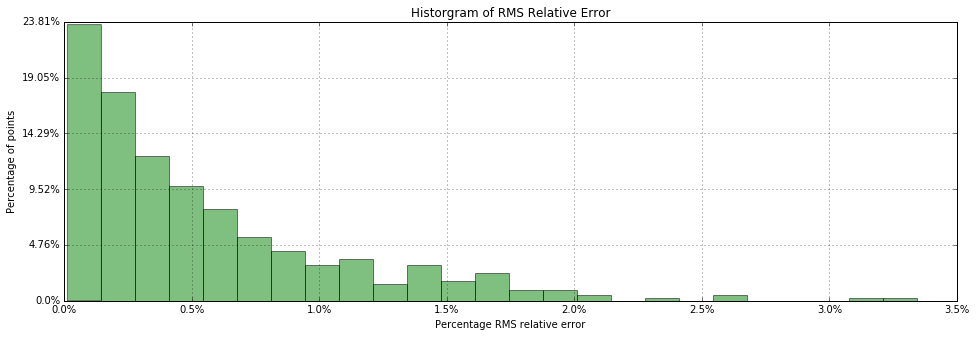

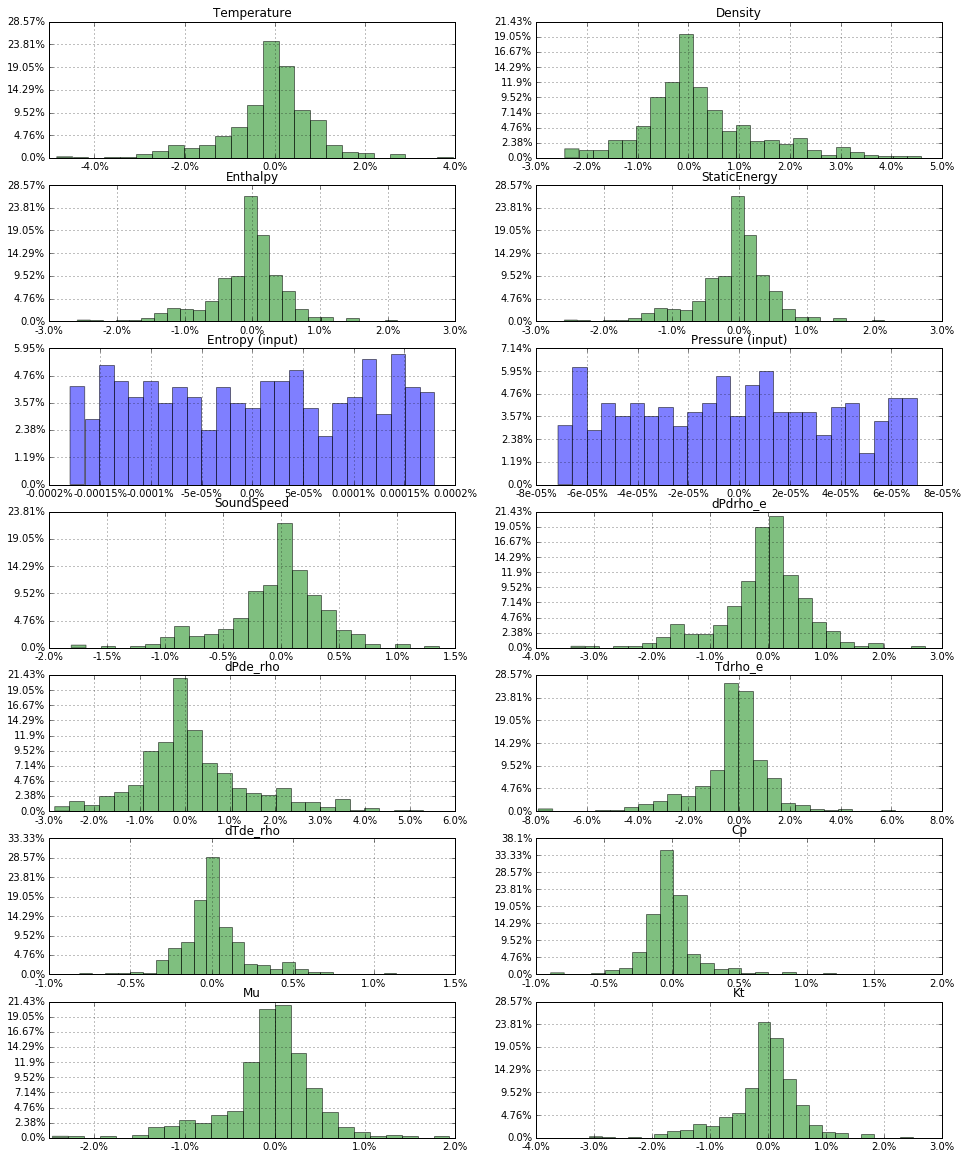

In [103]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "P" and "s"')
load_interp('Ps_out.dat')
REL_ERR = plot_RMS(interp_Pressure,interp_Entropy)
plot_mesh(mesh_Pressure, mesh_Entropy);
plot_hist_RMS(REL_ERR);
plot_hist_Individual("Pressure","Entropy"); 
#results show a bias 

## HS

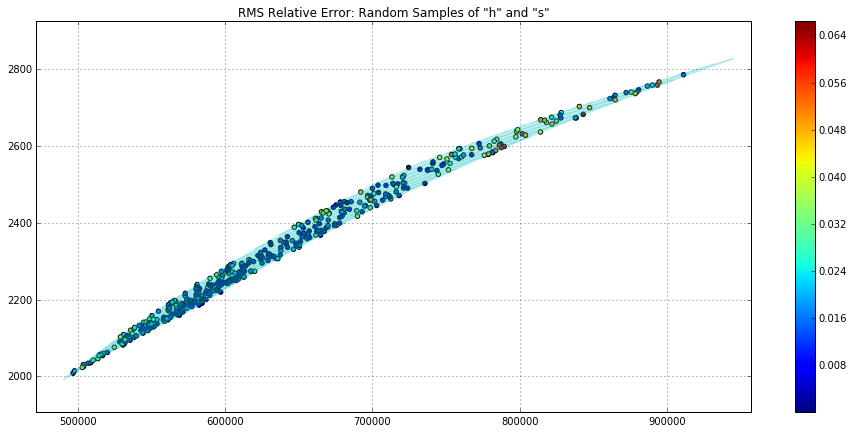

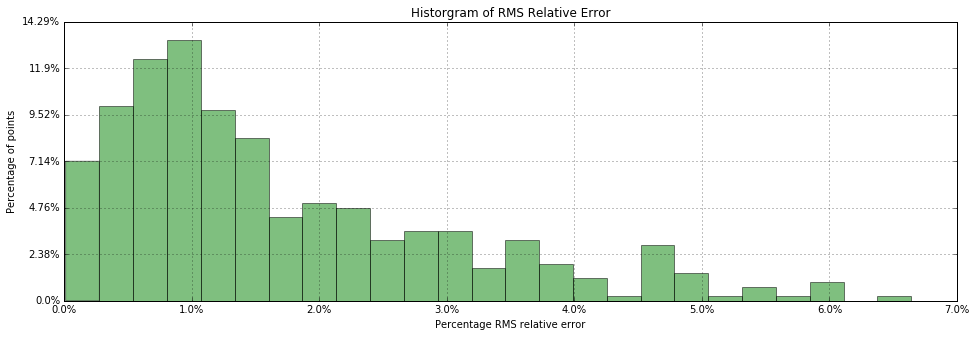

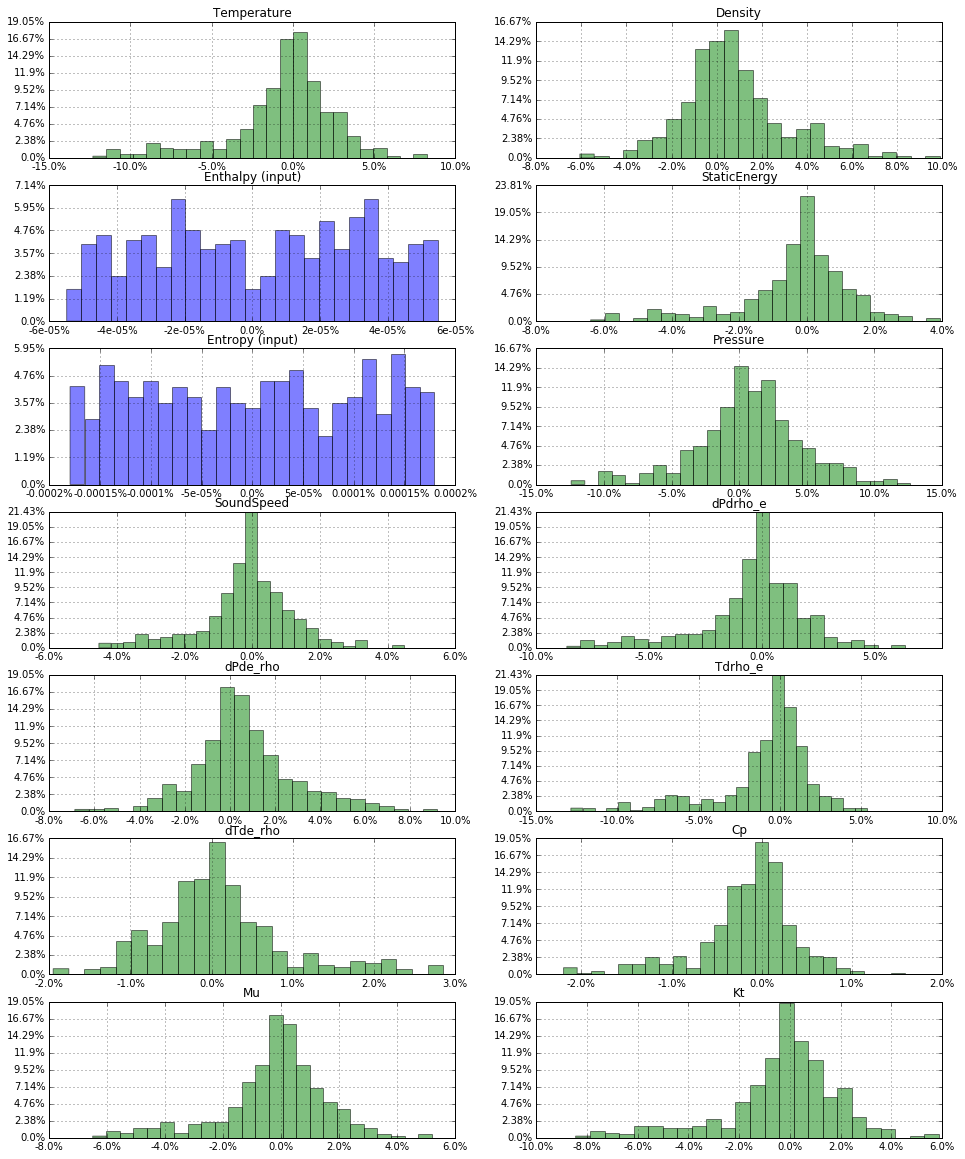

In [104]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.title('RMS Relative Error: Random Samples of "h" and "s"')
load_interp('hs_out.dat')
REL_ERR = plot_RMS(interp_Enthalpy,interp_Entropy)
plot_mesh(mesh_Enthalpy, mesh_Entropy);
plot_hist_RMS(REL_ERR);
plot_hist_Individual("Entropy","Enthalpy");